In [ ]:
from google.colab import drive
drive.mount('/content/drive')

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import pandas

training_data = pandas.read_excel("/content/drive/MyDrive/Section B - Toxic comment classifier/Training data.xlsx")

# Obtains list of contractions from text file
contractions_file = open("/content/drive/MyDrive/Section B - Toxic comment classifier/contractions.txt")

'import pandas\n\ntraining_data = pandas.read_excel("/content/drive/MyDrive/Third Year/Comp 316/Project - Toxic comment classifier/Training data.xlsx")'

In [ ]:
from nltk import tokenize
import nltk
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import Random

# Converting a pandas Dataframe to a numpy array because they're easier to work with and overall lighter
np_training_data = np.asarray(training_data)
# REMOVES from the training data rows that contain blank text
for i in range(0, len(np_training_data)):
  if np_training_data[i][0] == " ":
    np_training_data = np.delete(np_training_data, i, 0)
  if(i == len(np_training_data)-1):
    break

output = []
for sentence in np_training_data:
  output.append(sentence[1:4])
training_text = np_training_data[:,0]
training_text, X_test, output, y_test = train_test_split(training_text, output, test_size = 0.5, random_state = Random.randint(1, 100), shuffle = True)

In [ ]:
print(np_training_data[:5])

[['cock  suck before you piss around on my work' 0.0 1.0 0.0 1.0]
 [' reply are you being facetious  if not  you would have relayed the same message to jza and mrsc as my words were no more stern than theres  if you would like evidence for any of the claims made on the talk  then i will only be too glad to provide  you also failed to provide diffs in your message to me  in regards to which words you re claiming are offesive  perhaps wp assume good faith the two users constantly harass and follow me to articles making disruptive edits in violation of numerous wikipedia guidelines  wp harass is just one for example the removal of third party references from articles which don t suit their pov  without entering an edit summary  considered by wikipedia guidelines as bad faith and a violation of wp blank the violation of wp neo by adding derogatory neologisms to the articles of organisations who they do not personally agree with  despite being made aware of the policy  despite not having an

In [ ]:
 #Combines contractions allowing us to later slit them into their indivutual words.
def contraction_merger(sentence):
  sentence = sentence
  try:
    sentence = sentence.replace(" t ", "'t ")
    sentence = sentence.replace(" d ", "'d ")
    sentence = sentence.replace(" ll ", "'ll ")
    sentence = sentence.replace(" m ", "'m ")
    sentence = sentence.replace(" ve ", "'ve ")
    sentence = sentence.replace(" s ", "'s ")
    sentence = sentence.replace(" re ", "'re ")
    sentence = sentence.replace(" ve ", "'ve ")
    sentence = sentence.replace(" ing ", "ing ")
    sentence.strip()
    return sentence
  except AttributeError:
    print(sentence, "index: ", i)
    
def combine_contractions(text):
    for i in range(len(text)):
      text[i] = contraction_merger(text[i])


Remove **Stopwords** and **single letters** like 'c', 'b' etc

Our data has letters which are of no use to the training of our model and only contribute to an enlarged corpusm hence we remove them too

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(sentence, contractions):
  stop_words = stopwords.words("english")
  stop_words.append("i'm")
  stop_words.append("ing")
  stop_words.append("'")
  for i in range(len(contractions)):
    stop_words.append(contractions[i])
  
  # Adds single letters to list of stop words
  for letters in range(ord('b'), ord('z') + 1):
    stop_words.append(chr(letters))

  words = [word for word in sentence.split() if word.lower() not in stop_words]
  new_words = " ".join(words)
  return new_words

**Lemmatization** of the training set

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag



lemma_obj = WordNetLemmatizer()

# Function to capture POS tags and map to lemmatizer
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV
                }

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(sentence_data):
  lemmatized_text = []
  # Lemmatize the tokens
  for sentence_index in range(len(sentence_data)):
    sentence = sentence_data[sentence_index]

    lemmatized_sentence = []
    for word in sentence:
      lemma = lemma_obj.lemmatize(word, get_wordnet_pos(word))
      lemmatized_sentence.append(lemma)
    lemmatized_text.append(lemmatized_sentence)
  return lemmatized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lumko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lumko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Tokenizing

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
def clean_and_process_data(text):

  # Acts on the corpus passed into it
  combine_contractions(text)
  
  # Dumps labels
  contractions_file.readline()
  contractions_file.readline()
  
  # Reads the contractions into a list of list
  contraction_sets = []
  additional_contractions = []
  while True:
      line = contractions_file.readline()
      if (line == ""):
          break
      contraction_sets.append(word_tokenize(line))

  for contraction_set in contraction_sets:
      additional_contractions.append(contraction_set[0].lower())
    
  
  # Removes stop words from entire corpus
  from nltk.corpus import stopwords
  for i in range(len(text)):
    text[i] = remove_stopwords(text[i], additional_contractions)
  
  # Perform word tokenization on each sentence and checks to see if its flase flagged contraction
  tokenized_text = []
  for i in range(len(text)):
    tokenized_sentence = word_tokenize(text[i])
    constructed_sentence = []
    for token in tokenized_sentence:
      if not("'" in token) and not(len(token) < 2):
        constructed_sentence.append(token)
      #else:
      #  print(token)
    tokenized_text.append(constructed_sentence)

  return tokenized_text
  #return lemmatize(tokenized_text)

processed_training_text = clean_and_process_data(training_text)
print("Finished Training data preprocssing")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lumko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lumko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finished Training data preprocssing


**Encodes** the text/ **Maps each word** to an integer

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

# Encode the corpus so it can be feed into an embedding layer

def encode_sequences(sequence):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sequence)
  sequence = tokenizer.texts_to_sequences(sequence)
  vocab_size = len(tokenizer.word_index) +1
  return [sequence, vocab_size]

processed_training_text_encodings, vocab_size  = encode_sequences(processed_training_text)

# Determines the longest sequnece and its lenght will be the sequence_length
index_of_max_seq_length = 0;
for outer_index in range(len(processed_training_text_encodings)):
  sentence = processed_training_text_encodings[outer_index];
  if(len(sentence) > len(processed_training_text_encodings[index_of_max_seq_length])):
    index_of_max_seq_length = outer_index

seq_length = len(processed_training_text_encodings[index_of_max_seq_length])

In [ ]:
print(processed_training_text_encodings)

**padds** each sequence

In [ ]:
from numpy import array

# Padds all sequnces of data to ensure they're all the same length
# Overloaded funtion to expect floats snce the embeddigns are normalized, float64 was used to maintain precision
processed_training_text_encodings = tf.keras.preprocessing.sequence.pad_sequences(processed_training_text_encodings, dtype = "float64", padding = 'post')
print("Embeddings Shape: ", processed_training_text_encodings.shape)
processed_training_text_encodings = np.expand_dims(processed_training_text_encodings, -1)

# Creates a layer that'll mask the sequence's so the padded timesteps can be skipped 0=skipp/nothing to read
tf_processed_training_text_encodings = tf.convert_to_tensor(processed_training_text_encodings, dtype = "float64")
masking_layer = tf.keras.layers.Masking(mask_value=0)
#masking_processed_training_text_encodings = masking_layer(processed_training_text_encodings)



Embeddings Shape:  (8284, 1251)


In [ ]:

print(processed_training_text_encodings[0])


[[ 550.]
 [ 641.]
 [1469.]
 ...
 [   0.]
 [   0.]
 [   0.]]


Creates the **embedding layer** from our word embedding matrix

**Build** architecture of the model

In [ ]:
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM, GRU, Dropout

   #1.Model Architecture
model = Sequential()
print(vocab_size, seq_length)
model.add(Embedding(len(processed_training_text), seq_length, mask_zero=True))
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(3, activation = 'softmax'))
print(model.summary())

26598 1251
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1251)        10363284  
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 64)          328704    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 10,717,015
Trainable params: 10,717,015
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)#0.0001
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

tf_output = tf.convert_to_tensor(output)
#processed_training_text_encodings = np.asarray(processed_training_text_encodings).astype('float32')
history = model.fit(tf_processed_training_text_encodings, tf_output, epochs =16)

Epoch 1/16
259/259 [==============================] - 168s 486ms/step - loss: 0.3953 - accuracy: 0.4051
Epoch 2/16
259/259 [==============================] - 128s 495ms/step - loss: 0.3590 - accuracy: 0.4057
Epoch 3/16
259/259 [==============================] - 127s 490ms/step - loss: 0.3654 - accuracy: 0.4056
Epoch 4/16
259/259 [==============================] - 127s 491ms/step - loss: 0.3925 - accuracy: 0.4034
Epoch 5/16
259/259 [==============================] - 126s 489ms/step - loss: 0.3916 - accuracy: 0.4056
Epoch 6/16
259/259 [==============================] - 124s 480ms/step - loss: 0.3839 - accuracy: 0.4039
Epoch 7/16
259/259 [==============================] - 119s 462ms/step - loss: 0.3824 - accuracy: 0.4055
Epoch 8/16
259/259 [==============================] - 129s 500ms/step - loss: 0.3655 - accuracy: 0.4055
Epoch 9/16
259/259 [==============================] - 123s 477ms/step - loss: 0.3493 - accuracy: 0.4060
Epoch 10/16
259/259 [==============================] - 121s 467m

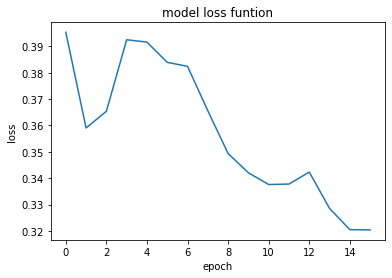

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss funtion')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#model = tf.keras.models.load_model(f"c:/wieghted.h5")

**Testing**

In [ ]:
def test():
  processed_X_test = clean_and_process_data(X_test)
  processed_X_test_encodings, vocab_size  = encode_sequences(processed_X_test)

  # Padds all sequnces of data to ensure they're all the same length
  processed_X_test_encodings = tf.keras.preprocessing.sequence.pad_sequences(processed_X_test_encodings, dtype = "float32", padding = 'post')
  processed_X_test_encodings = np.expand_dims(processed_X_test_encodings, -1)

  tf_y_test = tf.convert_to_tensor(y_test)
  print("TEST")
  print(processed_X_test, y_test)
  model.evaluate(processed_X_test_encodings, tf_y_test)

test()

TEST
[['thank', 'bakewell', 'tart', 'never', 'sure', 'might', 'moment', 'good', 'get', 'friendly', 'message'], ['purpose', 'census', 'office', 'reinterpreting', 'foreign', 'census', 'hunch', 'spoken', 'rusyn', 'western', 'ukrainian', 'closely', 'related', 'example', 'father', 'learned', 'polish', 'home', 'mother', 'pennsylvania', 'coal', 'miner', 'understood', 'rusyn', 'working', 'years', 'underground', 'remember', 'saying', 'rusyn', 'like', 'referred', 'ukrainians', 'alive', 'today', 'would', 'understand', 'discussion', 'dr', 'franklin', 'please', 'cite', 'reliable', 'source', 'cold', 'war', 'era', 'rusyn', 'ukrainian', 'dispute', 'new', 'york', 'local', 'rusyns', 'ukrainians', 'happy', 'like', 'peas', 'pod', 'see', 'ukrainian', 'americans', 'new', 'york', 'city', 'ny', 'drop', 'line', 'lunch', 'regards'], ['dalit', 'oppressed', 'one', 'insult', 'ambedkar', 'key', 'dalit', 'emanciptor', 'uses', 'term', 'dalit', 'badge', 'honor', 'insulting', 'words', 'low', 'caste', 'people', 'would',

The model **predicts** classes of a given sentence

In [ ]:
def predict(text):
  to_predict = []
  to_predict.append(text)
  processed_X_test = clean_and_process_data(to_predict)
  processed_X_test_encodings, vocab_size  = encode_sequences(processed_X_test)

  # Padds all sequnces of data to ensure they're all the same length
  processed_X_test_encodings = tf.keras.preprocessing.sequence.pad_sequences(processed_X_test_encodings, dtype = "float32", padding = 'post')
  processed_X_test_encodings = np.expand_dims(processed_X_test_encodings, -1)

  tf_y_test = tf.convert_to_tensor(y_test)
  return model.predict(processed_X_test_encodings)

print(predict("Uhh you ugly as fuck nigga"))


[[0.3621611  0.42006934 0.21776953]]


**Prediction 1**

In [ ]:
print(predict("I will fucken kill you"))

[[0.03068327 0.94147384 0.02784296]]


**Prdiction 2**

In [ ]:
print(predict("I'm going to hit ypu"))

[[0.26854154 0.5616049  0.16985358]]


**F1 evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report

# Predicts the toxicity of a each test sentence
prediction = []
for sent in X_test:
  try:
    pred = predict(sent)
    prediction.append(pred)
  except:

    prediction.append([0,0,0])

def convert_pred_to_int(predictions):
  broken = 0
  for index in range(len(predictions)):
    try:
      predictions[index] = np.array(predictions[index]>=0.5).astype(int).flatten()
    except:
      predictions[index] = [0,0,0]
      broken = broken + 1
  print("BROKEN: ", broken)
  return predictions

prediction = np.array(convert_pred_to_int(prediction))

y_test = np.array(y_test, np.int32)

print(classification_report(y_test, prediction))


BROKEN:  3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       689
           1       0.45      0.21      0.28      3937
           2       0.00      0.00      0.00       228

   micro avg       0.45      0.17      0.24      4854
   macro avg       0.15      0.07      0.09      4854
weighted avg       0.37      0.17      0.23      4854
 samples avg       0.10      0.09      0.09      4854



C:\ProgramData\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print()

In [ ]:
print(prediction)

[[0 1 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
